In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv("C:/Users/jahna/Downloads/IMDBDataset.csv")  # Ensure the dataset is in the same directory
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Dataset shape: (50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


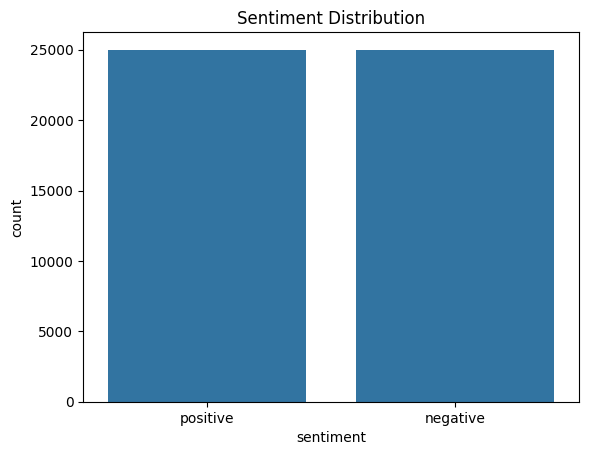

In [2]:
# Step 3: Explore Dataset
print("Dataset shape:", df.shape)
print(df['sentiment'].value_counts())
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [7]:
# Step 4: Text Preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep letters only
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)
print(df[['review', 'clean_review']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  


In [19]:
# Step 5: Prepare Data for Model
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [20]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 6: Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [24]:

# Step 8: Model Evaluation
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.895

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000


Confusion Matrix:
 [[4376  585]
 [ 465 4574]]


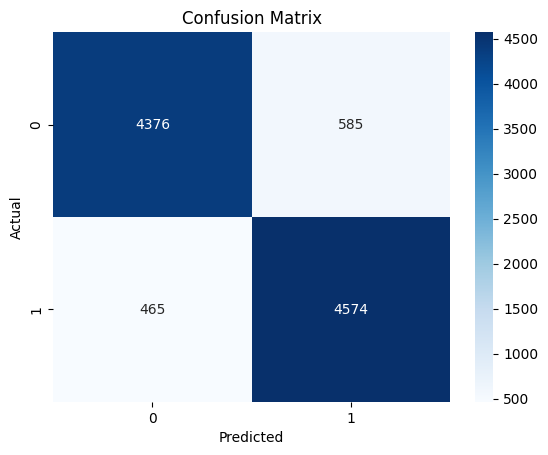

In [25]:
# Step 9: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
wrong_preds = df.iloc[y_test[(y_pred != y_test).tolist()].index]
print("\nSample Misclassified Reviews:")
print(wrong_preds[['review', 'sentiment']].head())



Sample Misclassified Reviews:
                                                  review sentiment
33553  I really liked this Summerslam due to the look...  positive
49498  Okay, I didn't get the Purgatory thing the fir...  positive
6113   The production quality, cast, premise, authent...  positive
15118  This movie was released originally as a soft "...  positive
43824  Although this series and the mini film in part...  negative
